In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.api import OLS

## Isolating the Graniteshares SSETF with the highest ADV

In [4]:
# Get data for all graniteshares etfs
tsl = yf.download('TSL', start='2022-01-01', end='2023-01-01')
tsli = yf.download('TSLI', start='2022-01-01', end='2023-01-01')
aapb = yf.download('AAPB', start='2022-01-01', end='2023-01-01')
conl = yf.download('CONL', start='2022-01-01', end='2023-01-01')
nvdl = yf.download('NVDL', start='2022-01-01', end='2023-01-01')
fbl = yf.download('FBL', start='2022-01-01', end='2023-01-01')
babx = yf.download('BABX', start='2022-01-01', end='2023-01-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
# Find the ETF with the highest average daily volume
print('TSL average daily volume: ', tsl['Volume'].mean())
print('TSLI average daily volume: ', tsli['Volume'].mean())
print('AAPB average daily volume: ', aapb['Volume'].mean())
print('CONL average daily volume: ', conl['Volume'].mean())
print('NVDL average daily volume: ', nvdl['Volume'].mean())
print('FBL average daily volume: ', fbl['Volume'].mean())
print('BABX average daily volume: ', babx['Volume'].mean())

TSL average daily volume:  13861.386138613861
TSLI average daily volume:  5935.416666666667
AAPB average daily volume:  4044.0
CONL average daily volume:  88218.0
NVDL average daily volume:  1807.6923076923076
FBL average daily volume:  192.30769230769232
BABX average daily volume:  884.6153846153846


## TSL spread research

TSL: 1.25x long tsla shares

In [9]:
# print the first day in tsl 
tsla = yf.download('TSLA', start='2022-08-09', end='2023-01-01')

[*********************100%***********************]  1 of 1 completed


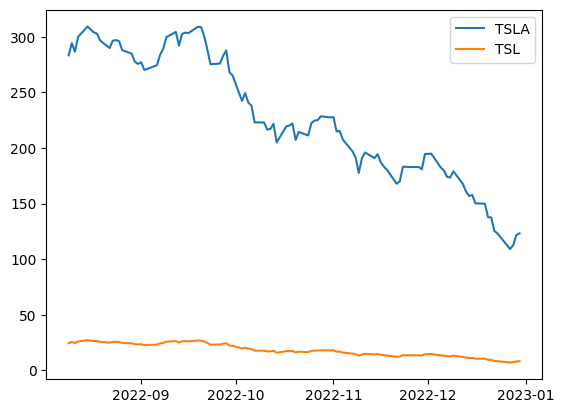

In [10]:
# Plot the two price charts against eachother
plt.plot(tsla['Close'], label='TSLA')
plt.plot(tsl['Close'], label='TSL')
plt.legend()
plt.show()

In [18]:
# Find the hedge ratio using OLS
model = OLS(tsla['Adj Close'], tsl['Adj Close'])
results = model.fit()
hedge_ratio = results.params[0]
print(f'hedge ratio: {hedge_ratio}')

hedge ratio: 12.19297652359799


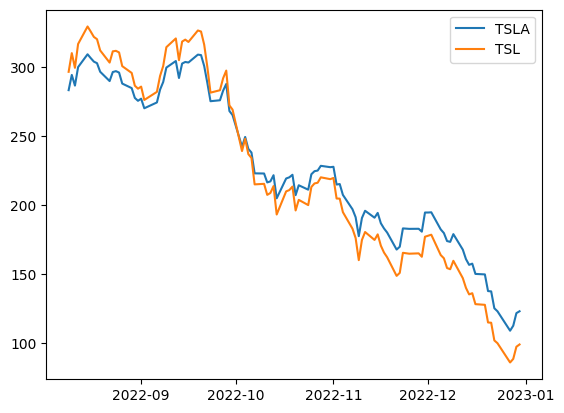

In [16]:
# Plot the two price charts against eachother with the multiplier
plt.plot(tsla['Close'], label='TSLA')
plt.plot(tsl['Close']*hedge_ratio, label='TSL')
plt.legend()

<AxesSubplot: xlabel='Date'>

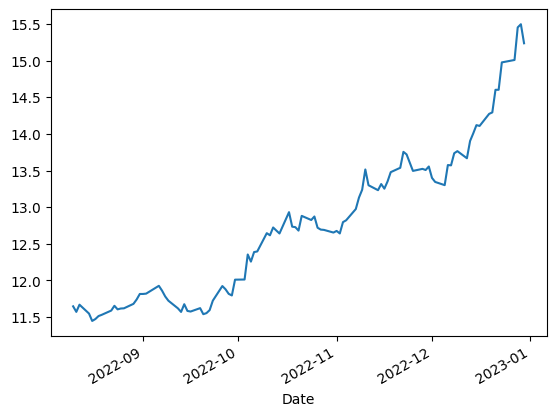

In [25]:
# Calculat3 the hedge ratio between tsl and tsla as the previous day's tsla price divided by the previous day's tsl price
tsl['hedge_ratio'] = tsla['Adj Close'].shift(1) / tsl['Adj Close'].shift(1)
tsl['hedge_ratio'].plot()

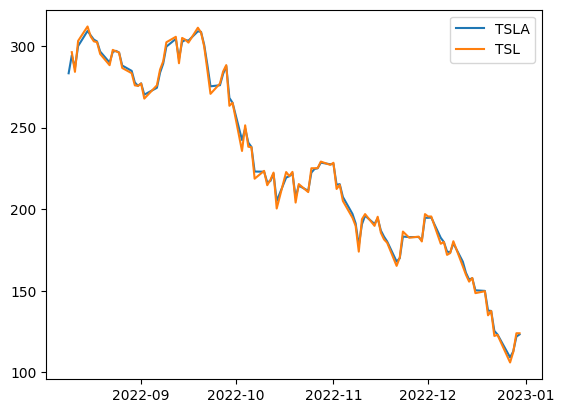

In [27]:
# Plot the two price charts against eachother with the hedge ratio applied to tsl
plt.plot(tsla['Close'], label='TSLA')
plt.plot(tsl['Close']*tsl['hedge_ratio'], label='TSL')
plt.legend()

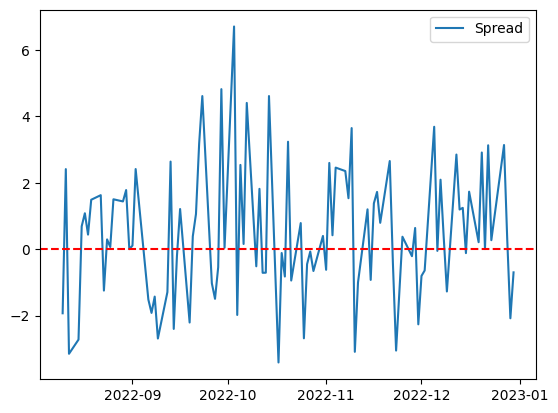

In [31]:
# Plot the spread between the two price charts over time
plt.plot(tsla['Close'] - tsl['Close']*tsl['hedge_ratio'], label='Spread')
# Put a horizontal line at 0
plt.axhline(0, color='red', linestyle='--')
plt.legend()

In [32]:
aapl_df = yf.download('AAPL', start='2021-01-01', end='2022-01-01')

[*********************100%***********************]  1 of 1 completed


In [34]:
"""
TABLE ETF (
    FileName VARCHAR(255) NOT NULL,
    Date DATE NOT NULL,
    FundTicker VARCHAR(255) NOT NULL,
    CUSIP VARCHAR(255) NOT NULL,
    Shares_Par FLOAT NOT NULL,
    MarketValue FLOAT NOT NULL,
    ContractSize int NOT NULL,
    SharesOutstanding FLOAT NOT NULL,
)
"""

# Make a method that converts the above aapl
def convert_to_table(df, filepath):
    # Create a new dataframe with the columns we want
    new_df = df[['Date', 'FundTicker', 'CUSIP', 'Shares_Par', 'MarketValue', 'ContractSize', 'SharesOutstanding']]
    # Rename the columns to match the table
    new_df.columns = ['Date', 'FundTicker', 'CUSIP', 'Shares_Par', 'MarketValue', 'ContractSize', 'SharesOutstanding']
    # Convert the Date column to a string
    new_df['Date'] = new_df['Date'].astype(str)
    # Convert the FundTicker column to a string
    new_df['FundTicker'] = new_df['FundTicker'].astype(str)
    # Convert the CUSIP column to a string
    new_df['CUSIP'] = new_df['CUSIP'].astype(str)
    # Convert the Shares_Par column to a float
    new_df['Shares_Par'] = new_df['Shares_Par'].astype(float)
    # Convert the MarketValue column to a float
    new_df['MarketValue'] = new_df['MarketValue'].astype(float)
    # Convert the ContractSize column to an int
    new_df['ContractSize'] = new_df['ContractSize'].astype(int)
    # Convert the SharesOutstanding column to a float
    new_df['SharesOutstanding'] = new_df['SharesOutstanding'].astype(float)
    # Return the new dataframe
    # Make the FileName column everything after Holdings/ in the filepath
    new_df['FileName'] = filepath.split('Holdings/')[1]
    return new_df

# Make a method that takes a df of the above format and converts it into tuples that can be used in a sql query
def convert_to_sql(df):
    # Create a list to hold the tuples
    sql_list = []
    # Loop through the rows of the dataframe
    for index, row in df.iterrows():
        # Create a tuple from the row
        sql_tuple = (row['FileName'], row['Date'], row['FundTicker'], row['CUSIP'], row['Shares_Par'], row['MarketValue'], row['ContractSize'], row['SharesOutstanding'])
        # Append the tuple to the list
        sql_list.append(sql_tuple)
    # Return the list
    return sql_list


KeyError: "None of [Index(['Date', 'FundTicker', 'CUSIP', 'Shares_Par', 'MarketValue',\n       'ContractSize', 'SharesOutstanding'],\n      dtype='object')] are in the [columns]"

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


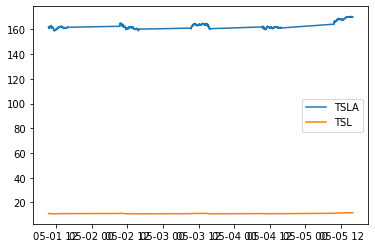

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

tsla= yf.download('TSLA', start='2023-05-01', end='2023-05-07', interval='1m')
tsl= yf.download('TSL', start='2023-05-01', end='2023-05-07', interval='1m')

# Make the data only on weekdays and between 930 and 400. 
tsla = tsla[(tsla.index.dayofweek < 5) & (tsla.index.hour >= 9) & (tsla.index.hour < 16)]
tsl = tsl[(tsl.index.dayofweek < 5) & (tsl.index.hour >= 9) & (tsl.index.hour < 16)]

plt.plot(tsla['Close'], label='TSLA')
plt.plot(tsl['Close'], label='TSL')
plt.legend()

In [12]:
# Make an array of hedge ratios, where the hedge ratio for an entire day is the opening price of tsla / the opening price of tsl. Get daily data for the same time range first
tsla_daily = yf.download('TSLA', start='2023-05-01', end='2023-05-07')
tsl_daily = yf.download('TSL', start='2023-05-01', end='2023-05-07')

# add a column hedge ratio to tsl, where the hedge ratio is the opening price of tsla / the opening price of tsl on the daily data
tsl['hedge_ratio'] = tsla_daily['Open'] / tsl_daily['Open']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [13]:
tsl

,Open,High,Low,Close,Adj Close,Volume,theo,hedge_ratio
Datetime,,,,,,,,
2023-05-01 09:30:00,11.0300,11.0300,11.0300,11.0300,11.0300,62601,NaN,NaN
2023-05-01 09:31:00,10.9100,10.9100,10.9100,10.9100,10.9100,3006,NaN,NaN
2023-05-01 09:35:00,10.8218,10.8218,10.8218,10.8218,10.8218,201,NaN,NaN
2023-05-01 09:36:00,10.8000,10.8000,10.8000,10.8000,10.8000,432,NaN,NaN
2023-05-01 09:44:00,10.8300,10.8300,10.8300,10.8300,10.8300,364,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-05-05 15:17:00,11.6680,11.6680,11.6680,11.6680,11.6680,100,NaN,NaN
2023-05-05 15:23:00,11.5883,11.5883,11.5883,11.5883,11.5883,300,NaN,NaN
2023-05-05 15:25:00,11.5900,11.5900,11.5900,11.5900,11.5900,281,NaN,NaN
